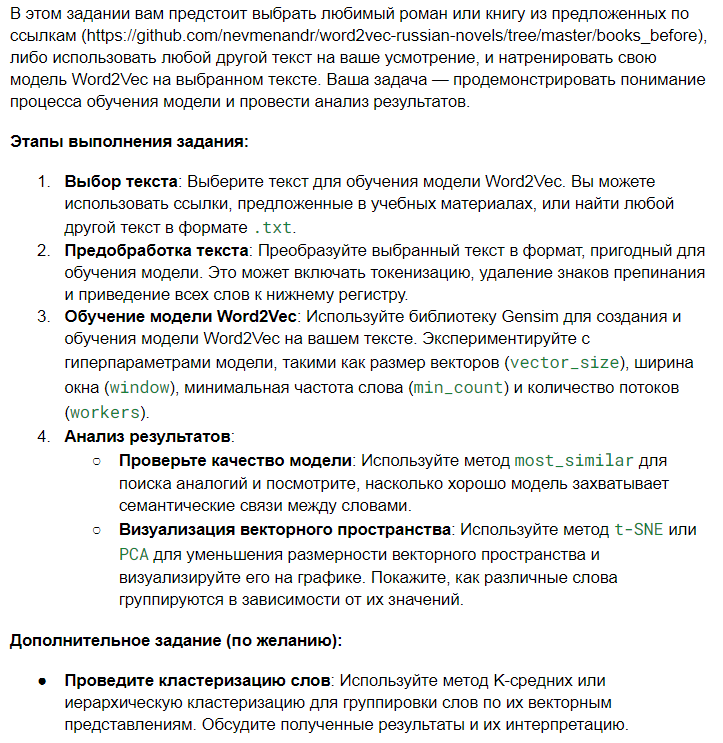


https://github.com/nevmenandr/word2vec-russian-novels/tree/master/books_before

In [45]:
url = 'https://raw.githubusercontent.com/nevmenandr/word2vec-russian-novels/master/books_before/WarAndPeace.txt'

In [46]:
import requests

resp = requests.get(url)
text = resp.text

print(text[-1000:])

тказаться от непосредственного чувства неподвижности земли и такого же чувства движения планет, так и для истории трудность признания подчиненности личности законам пространства, времени и причин состоит в том, чтобы отказаться от непосредственного чувства независимости своей личности. Но, как в астрономии новое воззрение говорило: 'Правда, мы не чувствуем движения земли, но, допустив ее неподвижность, мы приходим к бессмыслице; допустив же движение, которого мы не чувствуем, мы приходим к законам',- так и в истории новое воззрение говорит: 'И правда, мы не чувствуем нашей зависимости, но, допустив вашу свободу, мы приходим к бессмыслице; допустив же свою зависимость от внешнего мира, времени и причин, приходим к законам'.
В первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение; в настоящем случае - точно так же необходимо отказаться от несуществующей свободы и признать неощущаемую нами зависимость.
    
  
 


In [47]:
text = text.lower()

In [48]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize

sents = sent_tokenize(text)
len(sents)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


30005

In [49]:
sents[300]

'но теперь, я богом заклинаю вас, сделайте это для моего сына, и я буду считать вас благодетелем,- торопливо прибавила она.'

In [50]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\\w+')
tokenizer.tokenize(sents[300])

['но',
 'теперь',
 'я',
 'богом',
 'заклинаю',
 'вас',
 'сделайте',
 'это',
 'для',
 'моего',
 'сына',
 'и',
 'я',
 'буду',
 'считать',
 'вас',
 'благодетелем',
 'торопливо',
 'прибавила',
 'она']

In [51]:
sents_tokenize = [tokenizer.tokenize(sent) for sent in sents]
sents_tokenize[4:6]

[['je',
  'vois',
  'que',
  'je',
  'vous',
  'fais',
  'peur',
  'садитесь',
  'и',
  'рассказывайте'],
 ['так',
  'говорила',
  'в',
  'июле',
  '1805',
  'года',
  'известная',
  'анна',
  'павловна',
  'шерер',
  'фрейлина',
  'и',
  'приближенная',
  'императрицы',
  'марии',
  'феодоровны',
  'встречая',
  'важного',
  'и',
  'чиновного',
  'князя',
  'василия',
  'первого',
  'приехавшего',
  'на',
  'ее',
  'вечер']]

In [52]:
words = [item for sent in  sents_tokenize for item in sent]

In [53]:
len(words)

453282

In [54]:
len(set(words))

50827

In [55]:
from nltk.corpus import stopwords

stopwords_ru = stopwords.words('russian')
display(len(stopwords_ru))
stopwords_ru[:10]

151

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [56]:
sents_tokenize = [[word for word in text_cur if word not in stopwords_ru] for text_cur in sents_tokenize]

In [57]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()
text = "как в огромных тенетах, ходил в своих делах, стараясь не верить тому, что он запутался, и с каждым шагом все более и более запутываясь и чувствуя себя не в силах ни разорвать сети, опутавшие его, ни осторожно, терпеливо приняться распутывать их."
tokens = tokenizer.tokenize(text)

" ".join(morph.normal_forms(token)[0] for token in tokens)

'как в огромный тенёта ходить в свой дело стараться не верить тот что он запутаться и с каждый шаг всё более и более запутываться и чувствовать себя не в сила ни разорвать сеть опутать он ни осторожно терпеливо приняться распутывать они'

In [58]:
p = morph.parse('граф')
p

[Parse(word='граф', tag=OpencorporaTag('NOUN,anim,masc sing,nomn'), normal_form='граф', score=0.846153, methods_stack=((DictionaryAnalyzer(), 'граф', 52, 0),)),
 Parse(word='граф', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='граф', score=0.076923, methods_stack=((DictionaryAnalyzer(), 'граф', 34, 0),)),
 Parse(word='граф', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='граф', score=0.038461, methods_stack=((DictionaryAnalyzer(), 'граф', 34, 3),)),
 Parse(word='граф', tag=OpencorporaTag('NOUN,inan,femn plur,gent'), normal_form='графа', score=0.038461, methods_stack=((DictionaryAnalyzer(), 'граф', 55, 8),))]

In [59]:
sents_tokenize = [[morph.normal_forms(word)[0] for word in text_cur] for text_cur in sents_tokenize]

In [60]:
words = [item for sent in  sents_tokenize for item in sent]

In [61]:
len(words)

279276

In [62]:
len(set(words))

20326

In [63]:
from collections import Counter

word_dict = Counter(words)
word_dict.most_common()[:20]

[('который', 3630),
 ('сказать', 3344),
 ('свой', 2751),
 ('это', 2637),
 ('пьер', 2160),
 ('говорить', 2077),
 ('князь', 2021),
 ('человек', 1871),
 ('тот', 1333),
 ('лицо', 1308),
 ('знать', 1288),
 ('наташа', 1264),
 ('один', 1221),
 ('андрей', 1201),
 ('мочь', 1169),
 ('рука', 1038),
 ('время', 950),
 ('княжна', 906),
 ('глаз', 900),
 ('ростов', 814)]

In [64]:
%%time
from gensim.models.word2vec import Word2Vec

model = Word2Vec(vector_size=100, window=2, min_count=3, workers=4)

model.build_vocab(sents_tokenize)

model.train(sents_tokenize, total_examples=model.corpus_count, epochs=100)

CPU times: total: 4.66 s
Wall time: 10.4 s


(24945103, 27927600)

In [65]:
model.corpus_count

30005

In [66]:
len(model.wv.key_to_index)

9307

In [67]:
'граф' in model.wv.key_to_index

True

In [68]:
model.wv['граф'][:10]

array([ 1.6203576 , -1.187632  , -0.41726777, -0.28454202, -0.88519347,
        1.935659  ,  2.393979  , -0.671563  , -0.47220016,  0.21465102],
      dtype=float32)

In [69]:
model.wv['граф'].shape

(100,)

In [70]:
model.wv.similarity('граф', 'бал')

0.0756178

In [71]:
model.wv.similarity('граф', 'имение')

0.1993126

In [72]:
model.wv.similarity('граф', 'сражение')

-0.0019658292

In [73]:
model.wv.similarity('князь', 'бал')

0.009419705

In [74]:
model.wv.similarity('князь', 'имение')

0.123671785

In [75]:
model.wv.similarity('князь', 'сражение')

0.23382914

In [76]:
model.wv.most_similar('сражение')

[('бородинский', 0.6109663844108582),
 ('аустерлицкий', 0.47965049743652344),
 ('ольмюцкий', 0.45586639642715454),
 ('отступление', 0.4334821403026581),
 ('погоня', 0.40802839398384094),
 ('битва', 0.3963874578475952),
 ('столкновение', 0.39609289169311523),
 ('армия', 0.3871264159679413),
 ('толчок', 0.37500062584877014),
 ('войско', 0.3654681444168091)]

In [77]:
model.wv.most_similar('имение')

[('оброчный', 0.4643523097038269),
 ('имущество', 0.4635462164878845),
 ('губерния', 0.4039212167263031),
 ('хлеб', 0.39711806178092957),
 ('завод', 0.39155906438827515),
 ('охота', 0.382053017616272),
 ('загородный', 0.37904489040374756),
 ('богучаров', 0.3689831793308258),
 ('обедня', 0.3676416575908661),
 ('выбор', 0.3639706075191498)]

In [78]:
model.wv.most_similar(positive=['князь'], negative=['сражение'])[:10]

[('анатоль', 0.529015839099884),
 ('болконский', 0.4850054681301117),
 ('андрей', 0.45069435238838196),
 ('соболезновать', 0.3955141305923462),
 ('отец', 0.39387062191963196),
 ('сестра', 0.380622923374176),
 ('василь', 0.3801206648349762),
 ('княгиня', 0.3699178695678711),
 ('наташа', 0.3692305088043213),
 ('сухо', 0.36639392375946045)]

In [79]:
model.wv.most_similar(positive=['граф'], negative=['имение'])[:10]

[('умоляющий', 0.370210736989975),
 ('эка', 0.3567114770412445),
 ('ласковый', 0.3518213927745819),
 ('душенька', 0.3517439067363739),
 ('краснеть', 0.3511298894882202),
 ('савельич', 0.345456600189209),
 ('плясун', 0.34083449840545654),
 ('сердитый', 0.3317890465259552),
 ('звонко', 0.3276728093624115),
 ('иронически', 0.3243345022201538)]

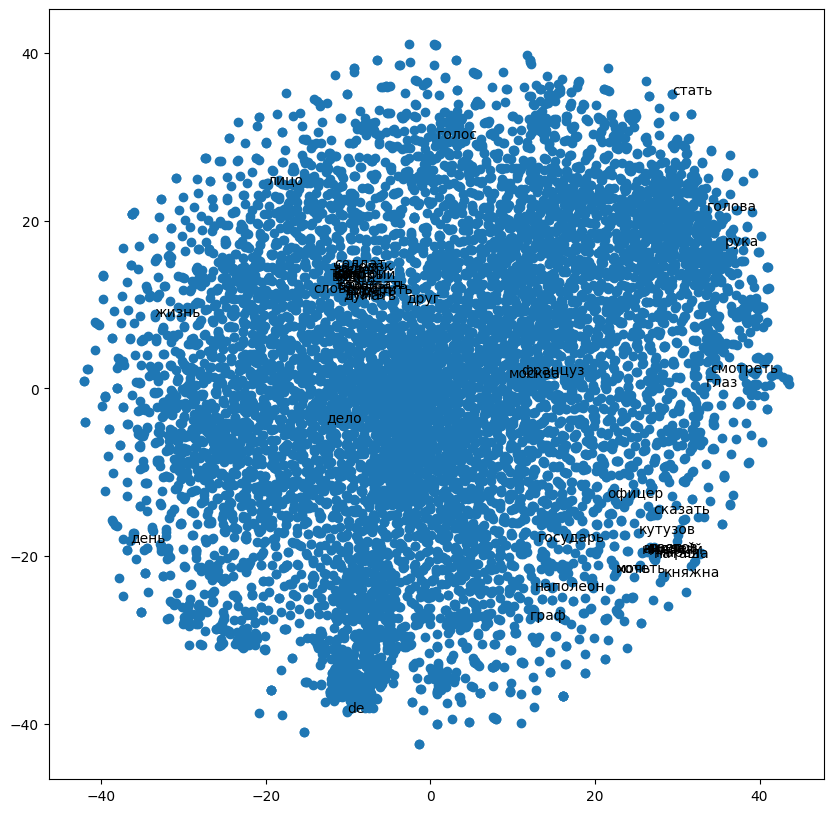

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])
tsne = TSNE(n_components=2)
reduced_vectors = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.show()

In [81]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(word_vectors)
clusters = kmeans.labels_

<IPython.core.display.Javascript object>

In [82]:
clustered_words = {i: [] for i in range(5)}
for i, label in enumerate(clusters):
    clustered_words[label].append(words[i])
    
for key, value in clustered_words.items ():
    print(key, ' : ', value)

0  :  ['рука', 'глаз', 'голова', 'сидеть', 'дверь', 'нога', 'глядеть', 'стол', 'лежать', 'проговорить', 'кричать', 'слеза', 'белый', 'взглянуть', 'быстро', 'плечо', 'встать', 'поднять', 'красный', 'крикнуть', 'держать', 'смеяться', 'платье', 'закричать', 'оглянуться', 'вокруг', 'оглядываться', 'подле', 'красивый', 'тело', 'чёрный', 'земля', 'окно', 'сесть', 'указывать', 'волос', 'поспешно', 'мундир', 'губа', 'поцеловать', 'подать', 'крыльцо', 'грудь', 'быстрый', 'играть', 'длинный', 'опустить', 'испуганный', 'дядюшка', 'бледный', 'угол', 'дама', 'сердито', 'тонкий', 'тихий', 'подняться', 'палец', 'входить', 'фигура', 'передний', 'солнце', 'чистый', 'рот', 'карета', 'кровь', 'положить', 'полковник', 'смех', 'небо', 'шёпотом', 'броситься', 'жест', 'лакей', 'худой', 'диван', 'шинель', 'кресло', 'изредка', 'близко', 'шея', 'оживлённый', 'холодный', 'платок', 'вздохнуть', 'снять', 'костёр', 'закрыть', 'петь', 'достать', 'светлый', 'нахмуриться', 'карта', 'снег', 'спасть', 'несвицкий', 'спин